# Mass shootings and Gun Control Debate: How mass shootings polarize gun control debate in the US

Authors: Lina Pedraza, Evelyn Sanchez, Camila Carrasco


## Texas Shooting effects on social media and financial markets

![Image of Shooting](http://cdn.cnn.com/cnnnext/dam/assets/171105195442-12-sutherland-springs-church-shooting-super-169.jpg)
Source: [CNN](http://www.cnn.com/2017/11/05/us/gallery/sutherland-springs-church-shooting/index.html)

A gunman with a military-style rifle opened fire on parishioners at a Sunday service at a small Baptist church in Sutherland Spring, Texas on November 5, 2017. The man, identified as Devin Patrick Kelley (26 years),  killed 26 people. 

Unfortunately, this is not a rare event. With this one, the US reached 307 mass shooting this year (mass shooting defined as a single incident in which four or more people, not including the shooter, are "shot and/or killed" at "the same general time and location.") [Gun Violence Archive](http://www.gunviolencearchive.org)





### PART 1: Analysis over Tweets on 2nd Amendment and Gun Control

*DATA SOURCE*: we used [Twitter Streaming API](https://developer.twitter.com/en/docs/tweets/filter-realtime/overview.html) to filter tweets in real time related to 2 keywords: **"2nd amendment" + "Second amendment"**. The query was active from Nov 1st, 2017 to Nov 7th, 2017.

Then, the first thing to do is to convert the json file from the Streaming API of Twitter to a Pandas Dataframe with the columns that we want:
- **text**: The actual UTF-8 text of the status update.
- **id**: The integer representation of the unique identifier for this Tweet.
- **created_at**: UTC time when this Tweet was created.
- **screen_name**: The screen name, handle, or alias that this user identifies themselves with.
- **followers_count**: The number of followers this account currently has
- **friends_count**: The number of users this account is following (AKA their “followings”).
- **favorite_count**: Indicates approximately how many times this Tweet has been liked by Twitter users
- **lang**: When present, indicates a BCP 47 language identifier corresponding to the machine

For more information, see [Tweet data dictionaries](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)

In [1]:
import json, re
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pytz
import datetime

tweets=[]
for line in open("twitter_stream_2a_sutherland.json"):

    s = line.replace(", \n", "").replace("rel=\"nofollow\"", "")
    s = re.sub(r"href=\"([a-z:\\/\.]*)\"", r"href='\1'", s)
    j = json.loads(s)

    if 'user' in j and 'text' in j:
        loc = "None"
        if j['place']: 
            loc = j['place']['full_name']
        elif j['user']['location']: 
            loc = j['user']['location']
   
    tweets.append([j['text'], j['id'], j['created_at'], j['user']['screen_name'],j['user']['followers_count'],j['user']['friends_count'],j['favorite_count'], j['user']['lang'],loc])


In [2]:
gundata=pd.DataFrame(data=tweets, 
                     columns=['tweet','id','date','screen_name','followers_count','followings_count', 'likes','language','location'])

In [20]:
#Total number of tweets during the seven days 
len(gundata)

166160

We have a very large database of **166,160** tweets.

In [22]:
#Unique number of tweets (this count, the original tweet and the first RT of that tweet
gundata['tweet'].nunique()

40726

Nevertheless, the unique number of tweets about the 2nd Amendment (original tweet and first retweet) is **40,726**.

Then, we specify the **date as index**, and we convert it from UTC (that's the default for Twitter) to Central Time.  The shooting in Sutherland Springs, Texas occurred around 11:30 a.m. local time (Central Time) on Sunday, Nov 5, 2017.

In [23]:
#Tranform date from a string to a datetime variable
from datetime import datetime
import re
gundata['date'] = pd.to_datetime(gundata['date'])
#Create two new columns, one for date and one for time
gundata['Time'], gundata['Date']= gundata['date'].apply(lambda x:x.time()), gundata['date'].apply(lambda x:x.date())
#Set Date as index of the dataframe
gundata.set_index('Date')

,tweet,id,date,screen_name,followers_count,followings_count,likes,language,location,Time
Date,,,,,,,,,,
2017-11-01,RT @jstew0903: @ConservativeTht Outlaw gun fre...,925762088701693952,2017-11-01 16:30:56,jstew0903,10,14,0,en,None,16:30:56
2017-11-01,RT @NatsinNY: Second Amendment: Sacrosanct\nSi...,925762088844308483,2017-11-01 16:30:56,lfsgd_diane,1918,3904,0,en,"San Antonio, Fl",16:30:56
2017-11-01,RT @LibyaLiberty: The 2nd amendment is untouch...,925762094003380224,2017-11-01 16:30:57,ajhollywd,178,267,0,en,None,16:30:57
2017-11-01,RT @NatsinNY: Second Amendment: Sacrosanct\nSi...,925762148785115136,2017-11-01 16:31:10,DarkInkPlctures,64,2269,0,en,"New York,NY",16:31:10
2017-11-01,RT @LibyaLiberty: The 2nd amendment is untouch...,925762199896801280,2017-11-01 16:31:22,IndigenousInc,18,162,0,en,S. Scottsdale,16:31:22
2017-11-01,@rig_tolando @ggongwer @realDonaldTrump Who on...,925762338774441985,2017-11-01 16:31:56,N8_the_G8,25,20,0,en,None,16:31:56
2017-11-01,RT @LibyaLiberty: The 2nd amendment is untouch...,925762344961085441,2017-11-01 16:31:57,ShonaKeir,233,802,0,en,"New York, NY",16:31:57
2017-11-01,@grey_ghost47 @OnebadbeochCook @goptraci @Jeff...,925762365550972928,2017-11-01 16:32:02,scottyl711,19,75,0,en,None,16:32:02
2017-11-01,"@NYGovCuomo IF NY had 2A rights,like Schumer, ...",925762425542119425,2017-11-01 16:32:16,DanSergiacomi,80,330,0,en,None,16:32:16


### The number of tweets about 2nd Amendment per day (Nov 1st to 7th, 2017)

Grouping the number of tweets per day, starting from Nov 1st to Nov 7th, we can see a substantial increase in the number after Nov. 5th, the day of the shooting, reaching a peak of **104,259** tweets on Nov. 6th. 

Two days after the shooting the number of tweets reduced to **39,239**.

In [24]:
#Group and count the number of tweets per day
gundata.groupby('Date').count()

,tweet,id,date,screen_name,followers_count,followings_count,likes,language,location,Time
Date,,,,,,,,,,
2017-11-01,2410,2410,2410,2410,2410,2410,2410,2410,2410,2410
2017-11-02,3778,3778,3778,3778,3778,3778,3778,3778,3778,3778
2017-11-03,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
2017-11-04,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177
2017-11-05,12277,12277,12277,12277,12277,12277,12277,12277,12277,12277
2017-11-06,104259,104259,104259,104259,104259,104259,104259,104259,104259,104259
2017-11-07,39238,39238,39238,39238,39238,39238,39238,39238,39238,39238


### Graph of the number of tweets per hour per day

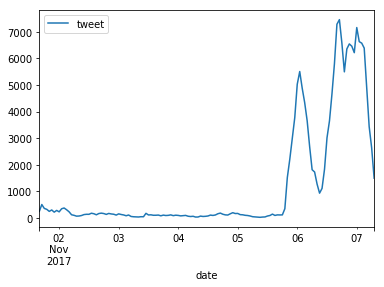

In [25]:
#Graph the number of tweets per hour per day 
%matplotlib inline
df_time = gundata.set_index('date').resample('1H').count()
df_time.plot(y='tweet')

Plotting the distribution of tweets per day and hour, we can observe a first peak on Nov. 5th after the shooting time
### The red line indicates the time of the shooting (around 11:20)
The number of tweets increased from the morning of Nov. 6th and had several peaks during the day and got a progressive decreased through the 7th of Nov. 

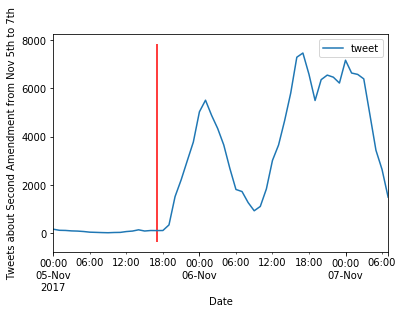

In [27]:
#Create a mask for Nov. 5 to 7  and save as dataframe
maskWeekend = (gundata['date'] > '2017-11-5') & (gundata['date'] <= '2017-11-8')
tweetsperDayWknd = gundata.loc[maskWeekend]
#Create a plot of the weekend
df_weekend = tweetsperDayWknd.set_index('date').resample('1H').count()
weekend= df_weekend.plot(y='tweet')
weekend.set_ylabel("Tweets about Second Amendment from Nov 5th to 7th")
weekend.set_xlabel("Date")
ymin, ymax = weekend.get_ylim()
weekend.vlines(x='2017-11-05 17:30:00', ymin=ymin, ymax=ymax,  color='r')

# Analysis of the most active users: Top 10 users

First we analyze the 10 users with the highest number of tweets, listed in the table below. Observing the tweets, we identify that five users: FirstFire2008, Big_Purple_One, Dwane_1, ljturner927 and north_dewayne, tweeted several times just two different texts in support of the National Riffle Association (NRA):

#### 1)	 “We all need to fight for our 2nd Amendment rights! Join me by becoming a member of the National Rifle Association: https://t.co/mwyhHHv1NE” 
##### 2)	 “Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/1JjH2rAVpv and give me credit: 5ZAZZ”. 

These tweets were tweeted with small variations, like randomly omitting some letters from a word or minior redaction changes.

Regarding the rest of the top 10 users, four of them tweeted messages defending the Second Amendment or Trump’s Government. In the case of the user BonzerWolf, it tweeted the same pro weapon message 64 times.

This might indicate that some of these accounts are not created for real users to express their opiniosn, but as fake accounts dedicated to promote the Second Amendment.

In [28]:
#Identify the user that tweet the most
gundata['screen_name'].nunique()
gundata.groupby('screen_name').count().sort_values('id', ascending= False).head(10)

,tweet,id,date,followers_count,followings_count,likes,language,location,Time,Date
screen_name,,,,,,,,,,
FirstFire2008,150,150,150,150,150,150,150,150,150,150
Big_Purple_One,142,142,142,142,142,142,142,142,142,142
2AAmericaNews,134,134,134,134,134,134,134,134,134,134
Protecting2nd,133,133,133,133,133,133,133,133,133,133
Dwane_1,105,105,105,105,105,105,105,105,105,105
ljturner927,96,96,96,96,96,96,96,96,96,96
The2ndA,91,91,91,91,91,91,91,91,91,91
north_dewayne,88,88,88,88,88,88,88,88,88,88
BonzerWolf,64,64,64,64,64,64,64,64,64,64


In [32]:
## 1st  most active user : @FirstFire2008. 
### Tweeted 150 times the same two tweets supporting the National Rifle Association (NRA). Real user??
![Fire.png](https://github.com/camilacd/Final-Project-2nd-Amendment/blob/master/Fire.png)

/bin/sh: -c: line 0: syntax error near unexpected token `https://github.com/camilacd/Final-Project-2nd-Amendment/blob/master/Fire.png'
/bin/sh: -c: line 0: `[Fire.png](https://github.com/camilacd/Final-Project-2nd-Amendment/blob/master/Fire.png)'


In [ ]:
![Image of Shooting](http://cdn.cnn.com/cnnnext/dam/assets/171105195442-12-sutherland-springs-church-shooting-super-169.jpg)

In [3]:
gundata['date'].to_datetime
gundata.set_index(gundata["date"], inplace = True)
gundata.set_index(gundata.index.tz_localize("UTC").tz_convert("US/Central"), inplace = True)

AttributeError: 'Index' object has no attribute 'tz_localize'

In [ ]:
df = pd.read_csv("test.csv", names = ["Date", "T [F]", "P [In]"],
                 parse_dates = ["Date"])

df.set_index(df["Date"], inplace = True)
df.set_index(df.index.tz_localize("UTC").tz_convert("US/Central"), inplace = True)
df

In [4]:
gundata.head()

,tweet,id,date,screen_name,followers_count,followings_count,likes,language,location
date,,,,,,,,,
2017-11-01 11:30:56-05:00,RT @jstew0903: @ConservativeTht Outlaw gun fre...,925762088701693952,Wed Nov 01 16:30:56 +0000 2017,jstew0903,10,14,0,en,None
2017-11-01 11:30:56-05:00,RT @NatsinNY: Second Amendment: Sacrosanct\nSi...,925762088844308483,Wed Nov 01 16:30:56 +0000 2017,lfsgd_diane,1918,3904,0,en,"San Antonio, Fl"
2017-11-01 11:30:57-05:00,RT @LibyaLiberty: The 2nd amendment is untouch...,925762094003380224,Wed Nov 01 16:30:57 +0000 2017,ajhollywd,178,267,0,en,None
2017-11-01 11:31:10-05:00,RT @NatsinNY: Second Amendment: Sacrosanct\nSi...,925762148785115136,Wed Nov 01 16:31:10 +0000 2017,DarkInkPlctures,64,2269,0,en,"New York,NY"
2017-11-01 11:31:22-05:00,RT @LibyaLiberty: The 2nd amendment is untouch...,925762199896801280,Wed Nov 01 16:31:22 +0000 2017,IndigenousInc,18,162,0,en,S. Scottsdale


In [5]:
gundata.index.dtype

datetime64[ns, US/Central]

To see how tweets about the 2nd Amendment grew in the mass shooting aftermath, we plot the number of tweets.

In [6]:
#Create a mask for the days and save as dataframe
maskWeekend = (gundata.index > '2017-11-05') & (gundata.index <= '2017-11-08')
tweetsperDayWknd = gundata.loc[maskWeekend]
tweetsperDayWknd

#Create a plot of the weekend
#df_time = tweetsperDayWknd.set_index('date').resample('1H').count()
#df_time.plot(y='tweet')

,tweet,id,date,screen_name,followers_count,followings_count,likes,language,location
date,,,,,,,,,
2017-11-05 00:00:10-05:00,Springfield &amp; Rock River Traitors to the S...,927037802834952192,Sun Nov 05 05:00:10 +0000 2017,2ndAmendmentC,3674,4325,0,en,None
2017-11-05 00:00:51-05:00,RT @wmcarterelliott: @Alyssa_Milano Time for u...,927037976110157824,Sun Nov 05 05:00:51 +0000 2017,Zoraida12098036,1083,1607,0,en,"Hollywood, Florida"
2017-11-05 00:01:32-05:00,RT @Harlan: This is why I support the 2nd Amen...,927038148034510849,Sun Nov 05 05:01:32 +0000 2017,enoughalready16,24798,24688,0,en,USA
2017-11-05 00:01:36-05:00,RT @Harlan: This is why I support the 2nd Amen...,927038163159093249,Sun Nov 05 05:01:36 +0000 2017,Mommy22Boys3689,54,105,0,en,None
2017-11-05 00:02:51-05:00,"RT @Everytown: ""Rules to better ensure gun saf...",927038477723734016,Sun Nov 05 05:02:51 +0000 2017,annie5133,2358,2884,0,en,"Denver, CO"
2017-11-05 00:03:55-05:00,2nd Amendment carry a 44 mag / just a little a...,927038745467011073,Sun Nov 05 05:03:55 +0000 2017,mwfjtppm1,239,337,0,en,None
2017-11-05 00:05:19-05:00,RT @Harlan: This is why I support the 2nd Amen...,927039098551926784,Sun Nov 05 05:05:19 +0000 2017,sbkfig,2604,5001,0,en,"Dunedin, Fl"
2017-11-05 00:06:58-05:00,Help NRA stand for 2nd Amendment Rights! Down...,927039512814895107,Sun Nov 05 05:06:58 +0000 2017,Big_Purple_One,5,21,0,en,None
2017-11-05 00:07:13-05:00,Help NRA stand forr 2nd Amendment Rights! Dow...,927039576958427136,Sun Nov 05 05:07:13 +0000 2017,Big_Purple_One,5,21,0,en,None


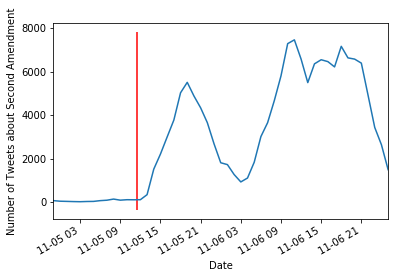

In [7]:
tweetsdata = tweetsperDayWknd.resample("1H").count()
tweets_count = tweetsdata["tweet"].plot()
tweets_count.set_ylabel("Number of Tweets about Second Amendment")
tweets_count.set_xlabel("Date")
ymin, ymax = tweets_count.get_ylim()
tweets_count.vlines(x='2017-11-05 17:30:00', ymin=ymin, ymax=ymax,  color='r')

WOW! Social media went crazy after the shooting (denoted by the red line).

### PART 2: Sentiment Analysis in Twitter

In this part, we will clasify the tweets as positive, negative and neutral, following the code used in this website: https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-

[TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis) is a Python library for processing textual data, diving into common natural language processing (NLP) tasks such as sentiment analysis.
In the first part, the tweet is cleaned and then, the function `def analize_sentiment(tweet)` classifies the polarity. 

In [8]:
from textblob import TextBlob
import re

#clean the tweets by removing links and special characters
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

#classify the polarity (negative= -1, neutral=0 and positive=1) using textblob
def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
# We create a column with the result of the analysis:
gundata['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in gundata['tweet'] ])

# We display the updated dataframe with the new column:
gundata.head(5)

In [ ]:
pos_tweets = [tweet for index, tweet in enumerate(gundata['tweet']) if gundata['sentiment'][index] > 0]
neu_tweets = [tweet for index, tweet in enumerate(gundata['tweet']) if gundata['sentiment'][index] == 0]
neg_tweets = [tweet for index, tweet in enumerate(gundata['tweet']) if gundata['sentiment'][index] < 0]

In [ ]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(gundata['tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(gundata['tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(gundata['tweet'])))

In [ ]:
gundata['positive']=gundata['sentiment']==1
gundata['negative']=gundata['sentiment']==-1
gundata['neutral']=gundata['sentiment']==0

In [ ]:
gundata.head(5)

In [ ]:
from numpy import *
import math
import matplotlib.pyplot as plt

positive = gundata[gundata['positive']==True].resample("1H").count().plot(y='tweet')
positive.set_title("Number of positive tweets about 2nd Amendment")

negative = gundata[gundata['negative']==True].resample("1H").count().plot(y='tweet')
negative.set_title("Number of negative tweets about 2nd Amendment")
                    
neutral = gundata[gundata['neutral']==True].resample("1H").count().plot(y='tweet')
neutral.set_title("Number of neutral tweets about 2nd Amendment")
                    
plt.show()

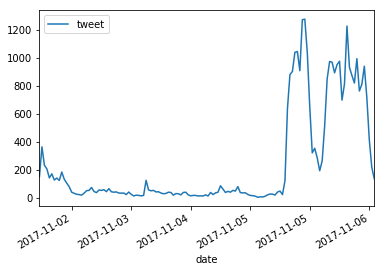

In [22]:
positive = gundata[gundata['positive']==True].resample("1H").count().plot(y='tweet')

In [ ]:
#http://localhost:8888/notebooks/Dropbox/MSESP/5.Fall2017/Programming/GitHub/FinalProject/Sentiment-Analysis-NLTK-ML-LSTM/Sentiment.ipynb
#http://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
#https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-
#https://github.com/RodolfoFerro/pandas_twitter/blob/master/02-visualization.md
#https://github.com/nagypeterjob/Sentiment-Analysis-NLTK-ML-LSTM

In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [82]:
import tweepy, json, random
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

In [83]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [ ]:
words=' '
count =0
f = open("twitter_stream_2a_sutherland.json", 'r')
for line in f:
    words= words + line
f.close

In [ ]:
wordcloud = WordCloud(
    font_path='Xerox Sans Serif Wide Bold Oblique.ttf',
    background_color='black',
    max_words=500,
    width=1800,
    height=1400
).generate(words)

In [ ]:
plt.axis('off')
plt.savefig('./tweetcloud2.png', dpi=300)
plt.show()

### PART 3: Correlation between number of tweets and gun stocks

Different reports suggest that mass-shooting events have an effect in the stock market price of the most important gun companies. For example, after San Bernardino shooting (Dec, 2015), Pulse attack (August, 2016) and the Paris terror attacks (Nov, 2015) gun stocks spiked because people started to buy more guns either for defensive motives or for the fear of that stricter regulations will be established.
In this analysis we will explore the price of the stock Sturm Ruger -RGR, an American firearm manufacturing company, and the S&P 500, the leading indicator of U.S. equities that reflects the behavior of the market. We will explore the behavior of the stock prices around the period of the mass shooting in Texas and Las Vegas and we will try to find evidence about how a shooting affects the price of RGR. We will use the S&P500 index to find out if the stock prices are changing because the whole market is changing or because of something else.
Limitation: our first approach was to explore if the volume of tweets related to the Mass shooting in Texas was a determinant of the price of the stock RGR. However, we only have information of 7 hours a day for the stock data since the stock market trades only 7 hours a day and it was very difficult to impute it 17 values since we did have 24 hour of data for the volume of tweets (although it was just for 2 days after the shooting).

Before running the code, it is required to download:

```
pip install pandas-datareader
```


In [5]:
%matplotlib inline
import pandas as pd
import json, re
import datetime
import string
import pytz
import matplotlib
from matplotlib import pyplot as plt
from pandas_datareader import data
#in the terminal: pip install pandas-datareader

We download the price data from Yahoo Finance for 2017 for the Sturm Ruger stock  and the S&P500

In [6]:
# Define the tickers to download. We would like to see RGR and the S&P500 index.
tickers = ['RGR', '^GSPC']

# Define which online source to use
data_source = 'yahoo'

# Set the period of time: we want data for 2017
start_date = '2017-01-01'
end_date = '2017-11-28'

# pandas_reader.data.DataReader to load the data. 
panel_data = data.DataReader(tickers, data_source, start_date, end_date)
panel_data

# We only want the adjusted closing prices. It returns a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
stocks = panel_data.loc['Close']
stocks.tail()

,RGR,^GSPC
Date,,
2017-01-09,53.049999,2268.899902
2017-01-06,54.150002,2276.979980
2017-01-05,54.099998,2269.000000
2017-01-04,52.900002,2270.750000
2017-01-03,53.450001,2257.830078


In [7]:
type(stocks.index)
#prices = pd.DataFrame(close)
#prices.head()

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
%pylab inline
# Change the size of plots
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


We start by plotting the prices of RGR and SPX during 2017. 

We find that in general, the RGR stock price behaved like the market (SPX) but since the middle of july, this tendency changed.

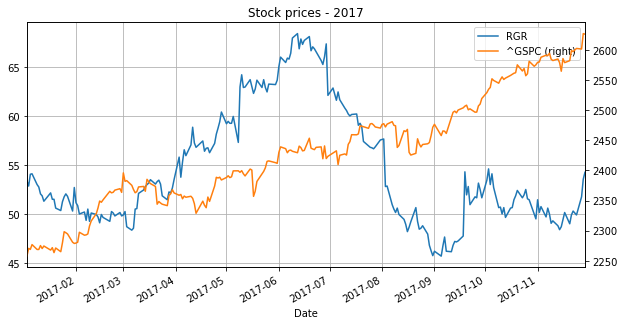

In [9]:
stocks.plot(secondary_y = ["^GSPC"], title = "Stock prices - 2017",grid = True)

In [10]:
#stocks.set_index('Date', inplace = True)
#stocks_nov = stocks[stocks.index > datetime.datetime(2017, 11, 1)]
#stocks_nov.head()

Plotting the prices only for the month of November we get the following graph

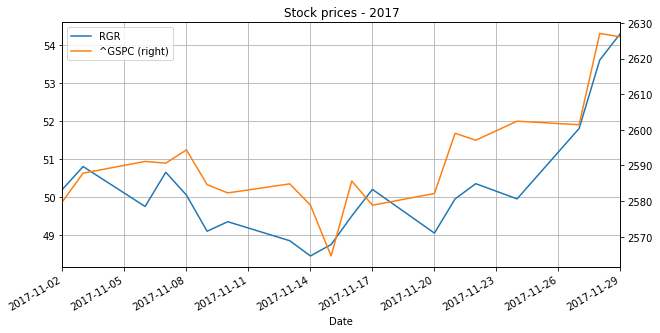

In [12]:
stocks[stocks.index > datetime.datetime(2017, 11, 1)].plot(secondary_y = ["^GSPC"], title = "Stock prices - 2017",grid = True)

Now, we would like to see graphically what happens with the price of RGR, 7 days before and after a shooting. 

For this purpose, we first explore the data of the shooting in Las Vegas on Oct 1st, 2017. The graph shows that after the shooting, the price of the stock increased significantly. However, we see that the market index increases as well in the same period. So this change is not necessarily a result of the shooting.

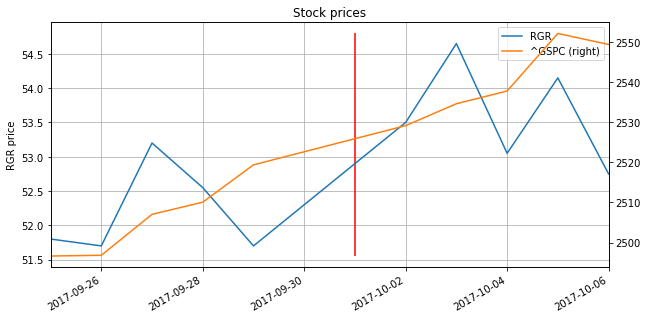

In [13]:
#RGR stock price before and after shootings: Vegas oct 1 2017
#We create a mask for the period
mask1 = (stocks.index >= datetime.datetime(2017, 9, 25)) & \
       (stocks.index <  datetime.datetime(2017, 10, 7))
plot2 = stocks.loc[mask1].plot(title = "Stock prices", secondary_y = ["^GSPC"], grid = True)
ymin, ymax = plot2.get_ylim()
plot2.vlines(x='2017-10-01', ymin=ymin, ymax=ymax,  color='r')
plot2.set_ylabel("RGR price")
plot2.set_xlabel("")

We want to see how the price changed after the shooting, so we create a new column with the difference of the prices before and after the shooting taking as a reference the last price before the shooting. We want to see the variation of the price taking as a reference the last price available before the shooting. 

In [14]:
#We create an index with the last price available before the shooting
date1 = datetime.datetime(2017, 9, 29)
index1 =stocks[stocks.index== date1]['RGR'][0]
stocks['Dif_vegas'] = (stocks['RGR'] - index1)/stocks['RGR']
stocks.head()

,RGR,^GSPC,Dif_vegas
Date,,,
2017-11-29,54.299999,2626.070068,0.047882
2017-11-28,53.599998,2627.040039,0.035448
2017-11-27,51.799999,2601.419922,0.001930
2017-11-24,49.950001,2602.419922,-0.035035
2017-11-22,50.349998,2597.080078,-0.026812


When we plot the percentual difference in the prices relative to the price on the date of the shooting, we see more clearly that after the shooting, the price of RGR increased by 3% on the next trading day and then another 2 percentage points on the second day.

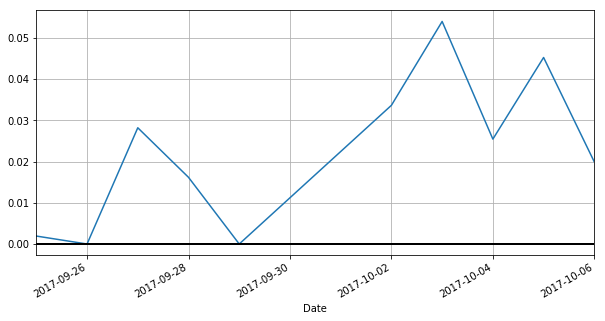

In [15]:
#RGR stock price for 2017
stocks.loc[mask1]['Dif_vegas'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)



We know replicate this analysis for our shooting of interest in Texas

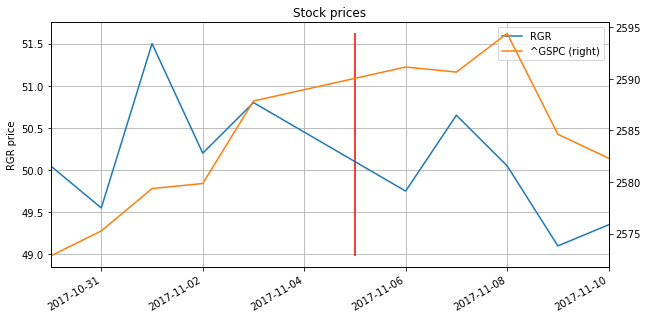

In [17]:
#RGR stock price before and after shootings: Texas nov 5 2017
mask2 = (stocks.index >= datetime.datetime(2017, 10, 30)) & \
       (stocks.index <  datetime.datetime(2017, 11, 13))
plot3 = stocks[['RGR', '^GSPC']].loc[mask2].plot(title = "Stock prices", secondary_y = ["^GSPC"], grid = True)
ymin, ymax = plot3.get_ylim()
plot3.vlines(x='2017-11-05', ymin=ymin, ymax=ymax,  color='r')
plot3.set_ylabel("RGR price")
plot3.set_xlabel("")

In [18]:
date = datetime.datetime(2017, 11, 3)
index2 =stocks[stocks.index== date]['RGR'][0]
#print(index)
stocks['Dif_Texas'] = (stocks['RGR'] - index2)/stocks['RGR']
stocks.head()

,RGR,^GSPC,Dif_vegas,Dif_Texas
Date,,,,
2017-11-29,54.299999,2626.070068,0.047882,0.064457
2017-11-28,53.599998,2627.040039,0.035448,0.052239
2017-11-27,51.799999,2601.419922,0.001930,0.019305
2017-11-24,49.950001,2602.419922,-0.035035,-0.017017
2017-11-22,50.349998,2597.080078,-0.026812,-0.008937


We can see that after the shooting in Texas (Nov 5th, 2017) the price of RGR decreased relative to the last price available before the shooting (Nov 3rd, 2017). As we saw in the graphs before, the price of RGR was also responding to the behavior of the market, in this period, the SP500 also decreased inmediately after the shooting.

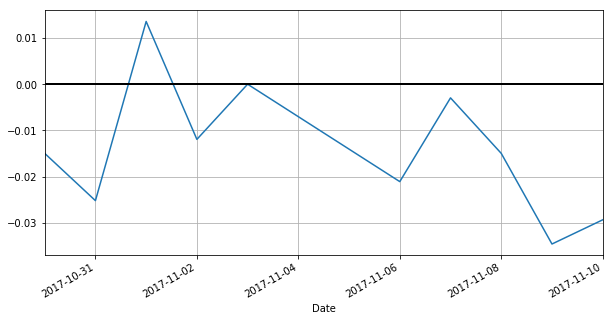

In [19]:
#RGR stock price for 2017
stocks.loc[mask2]['Dif_Texas'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)

Although we do not have a statistical model to explain the determinants on the behavior of the stock RGR, through our graphical analysis we find evidence that the stock price reacts to the context of the market rather than to an event of shooting. 

### END.